<a href="https://colab.research.google.com/github/Samarth-991/TimeSeries/blob/master/TimeSeries_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traffic Data Ananlysis

In [ ]:
import pandas as pd
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 
from pandas import Series 


In [ ]:
from google.colab import files
!files.upload()

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
!ls

sample_data  Test_0qrQsBZ.csv  Train_SU63ISt.csv


In [ ]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [ ]:
train_original=train.copy() 
test_original=test.copy()
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [ ]:
print (train.head())
print(train.dtypes)
print(train.shape)

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
ID           int64
Datetime    object
Count        int64
dtype: object
(18288, 3)


In [ ]:
#We will extract the time and date from the Datetime.
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format= '%d-%m-%Y %H:%M')

test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [ ]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [ ]:
train['day_of_week']= train['Datetime'].dt.dayofweek
train.head()

,ID,Datetime,Count,year,month,day,Hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [ ]:
temp1= train['day_of_week']

In [ ]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer)

In [ ]:
temp2

0        1
1        1
2        1
3        1
4        1
        ..
18283    0
18284    0
18285    0
18286    0
18287    0
Name: Datetime, Length: 18288, dtype: int64

In [ ]:
train['weekend']=temp2


In [ ]:
train.index = train['Datetime']
df=train.drop('ID',1)   
ts = df['Count'] 
ts

Datetime
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
                      ... 
2014-09-25 19:00:00    868
2014-09-25 20:00:00    732
2014-09-25 21:00:00    702
2014-09-25 22:00:00    580
2014-09-25 23:00:00    534
Name: Count, Length: 18288, dtype: int64

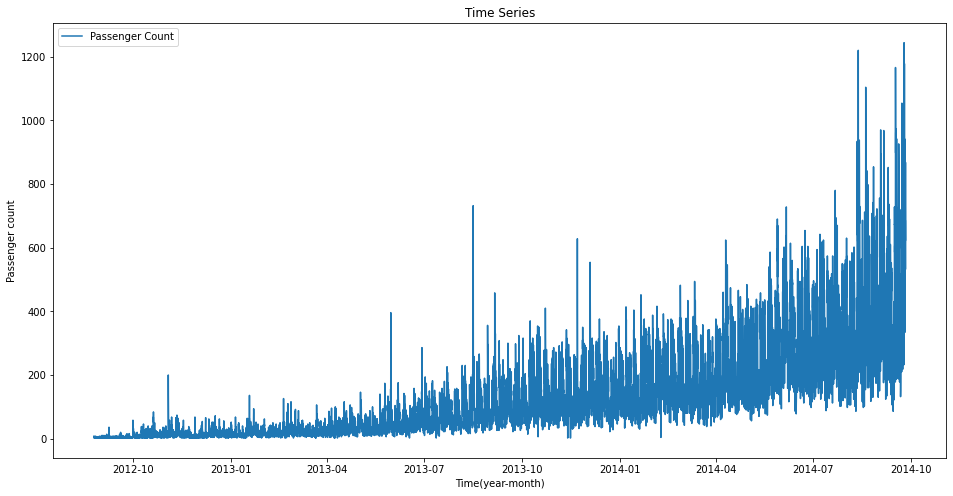

In [ ]:
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

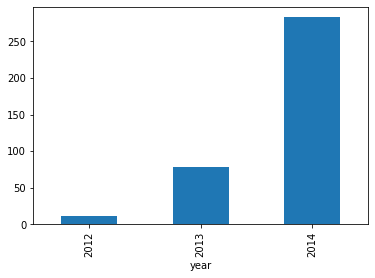

In [ ]:
"""
Hypothesis
Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high
"""
train.groupby('year')['Count'].mean().plot.bar()

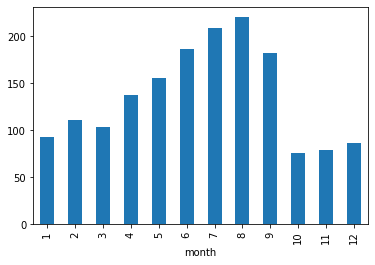

In [ ]:
train.groupby('month')['Count'].mean().plot.bar()
# Last three months mean traffic is less which is not correct data 

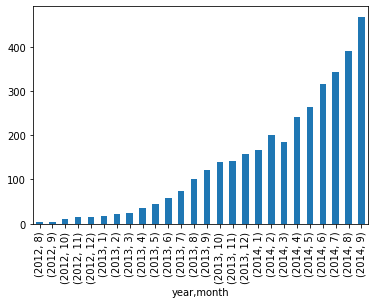

In [ ]:
train.groupby(['year','month'])['Count'].mean().plot.bar()

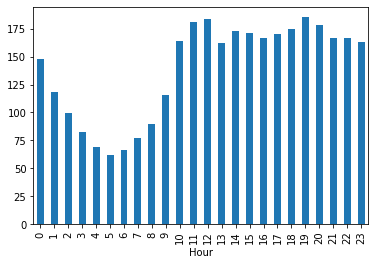

In [ ]:
train.groupby('Hour')['Count'].mean().plot.bar()

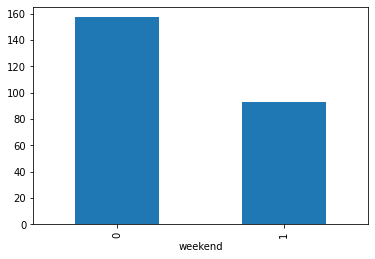

In [ ]:
train.groupby('weekend')['Count'].mean().plot.bar()

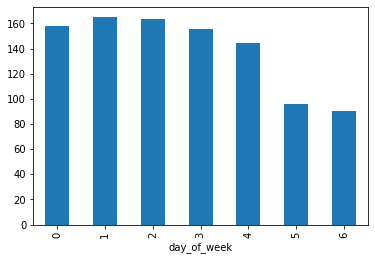

In [ ]:
train.groupby('day_of_week')['Count'].mean().plot.bar()

In [ ]:
train = train.drop('ID',1)

In [ ]:
train.head()

,Datetime,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [ ]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


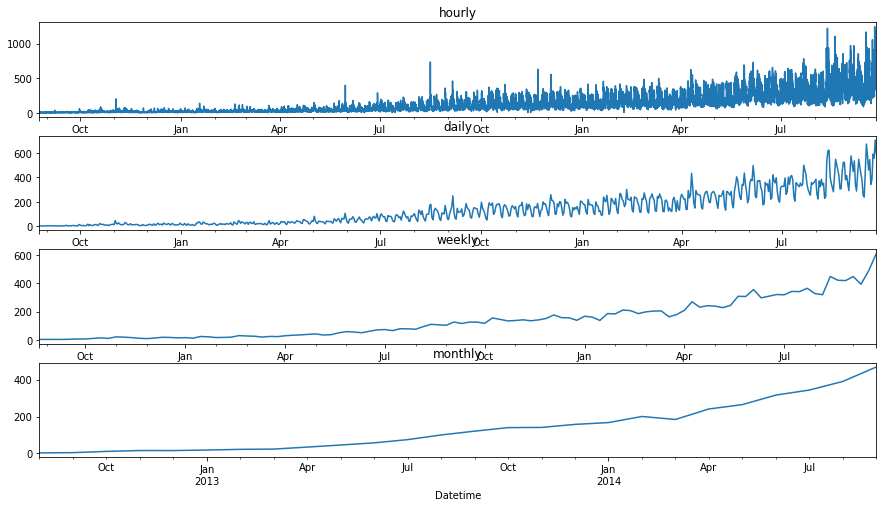

In [ ]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8),title="hourly",ax=axs[0]) # higly noisy
daily.Count.plot(figsize=(15,8),title="daily",ax=axs[1]) 
weekly.Count.plot(figsize=(15,8),title="weekly",ax=axs[2])
monthly.Count.plot(figsize=(15,8),title="monthly",ax=axs[3]) # least noisy 

In [ ]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
# to train we can not use tradional train and test 
train.head()
Train = train['2012-08-25':'2014-06-24'] 
Valid = train['2014-06-25':'2014-09-25']
Train.head()

,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [ ]:
Valid.head()

,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0


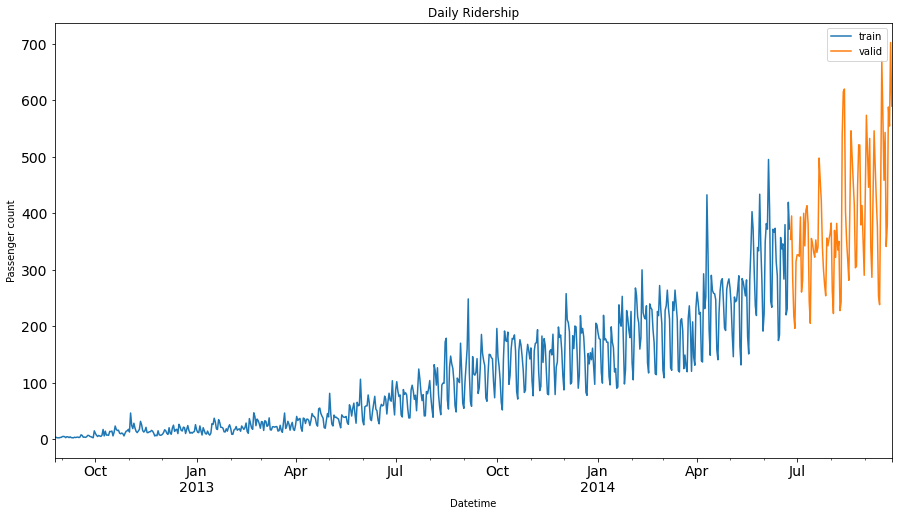

' multiple ways to handle modlelling : \ni) Naive Approach\nii) Moving Average\niii) Simple Exponential Smoothing\niv) Holt’s Linear Trend Model\n\n'

In [ ]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
Valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()
""" multiple ways to handle modlelling : 
i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model

"""


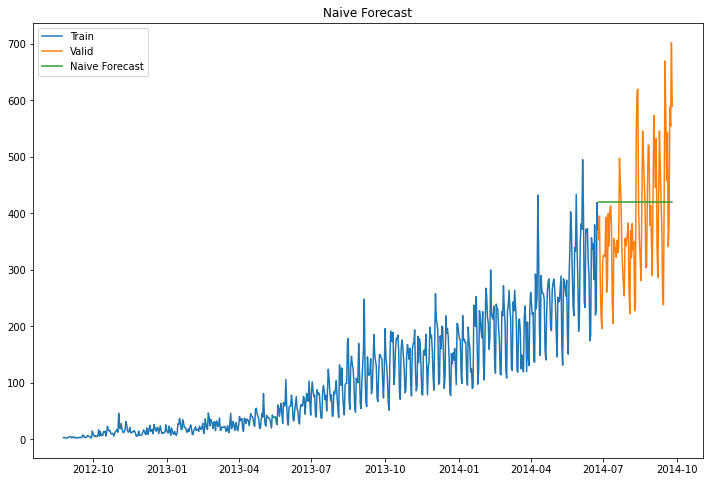

In [ ]:
"""
Naive approach :In this forecasting technique, we assume that the next expected point is equal to 
the last observed point. So we can expect a straight horizontal line as the prediction
"""
dd= np.asarray(Train.Count) 
y_hat = Valid.copy() 
y_hat['naive'] = dd[667]
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(Valid.index,Valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

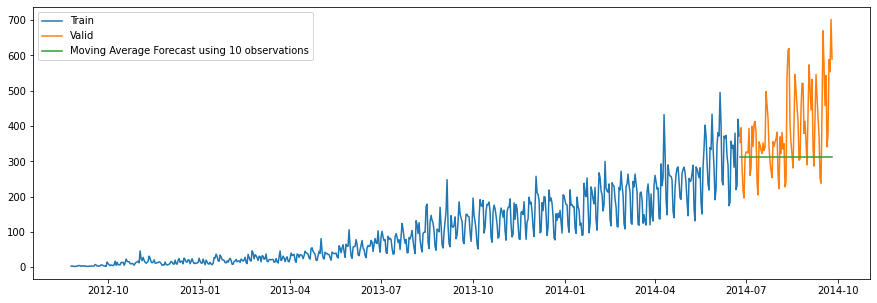

In [ ]:
y_hat_avg = Valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
# y_hat_avg = valid.copy() 
# y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
# plt.figure(figsize=(15,5)) 
# plt.plot(Train['Count'], label='Train') 
# plt.plot(valid['Count'], label='Valid') 
# plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
# plt.legend(loc='best') 
# plt.show() 
# y_hat_avg = valid.copy() 
# y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
# plt.figure(figsize=(15,5)) 
# plt.plot(Train['Count'], label='Train') 
# plt.plot(valid['Count'], label='Valid') 
# plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
# plt.legend(loc='best') 
# plt.show()

In [ ]:
"""
-> Simple Exponential Smoothing
In this technique, we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.
NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach.

"""
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = Valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(Valid))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
y_hat_avg['SES']

Datetime
2014-06-25    363.522492
2014-06-26    363.522492
2014-06-27    363.522492
2014-06-28    363.522492
2014-06-29    363.522492
                 ...    
2014-09-21    363.522492
2014-09-22    363.522492
2014-09-23    363.522492
2014-09-24    363.522492
2014-09-25    363.522492
Freq: D, Name: SES, Length: 93, dtype: float64

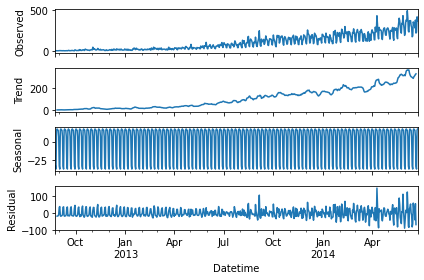

In [ ]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

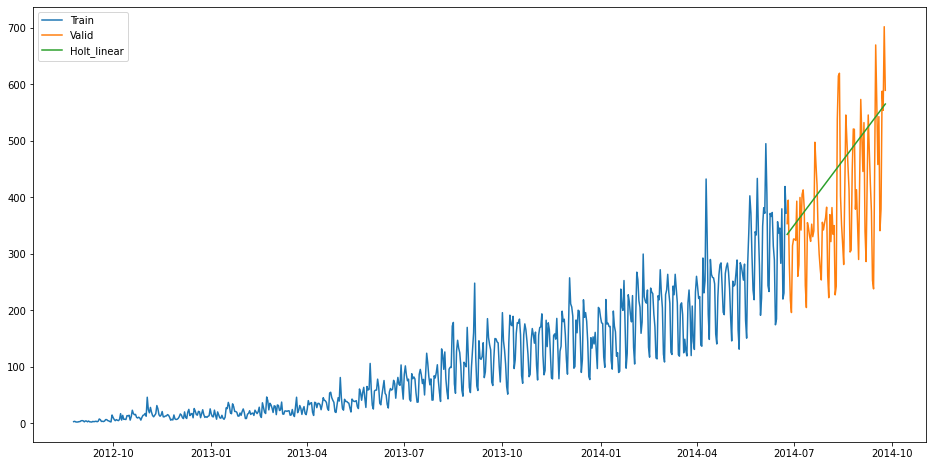

In [ ]:
y_hat_avg = Valid.copy() 

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(Valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error 
rms = np.sqrt(mean_squared_error(Valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041
